In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px

In [3]:
stock_list=pd.read_csv("data files/stock_list.csv")
stock_list.shape

(4417, 16)

In [7]:
data=pd.read_csv("data files/train_files/stock_prices.csv")
data.shape

(2332531, 12)

In [8]:
data.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [13]:
print("Min and max date in the dataset",data.Date.min()," to ", data.Date.max())
data.describe().style.format("{:.2f}")

Min and max date in the dataset 2017-01-04  to  2021-12-03


,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,Target
count,2332531.00,2324923.00,2324923.00,2324923.00,2324923.00,2332531.00,2332531.00,18865.00,2332293.00
mean,5894.84,2594.51,2626.54,2561.23,2594.02,691936.56,1.00,22.02,0.00
std,2404.16,3577.19,3619.36,3533.49,3576.54,3911255.94,0.07,29.88,0.02
min,1301.00,14.00,15.00,13.00,14.00,0.00,0.10,0.00,-0.58
25%,3891.00,1022.00,1035.00,1009.00,1022.00,30300.00,1.00,5.00,-0.01
50%,6238.00,1812.00,1834.00,1790.00,1811.00,107100.00,1.00,15.00,0.00
75%,7965.00,3030.00,3070.00,2995.00,3030.00,402100.00,1.00,30.00,0.01
max,9997.00,109950.00,110500.00,107200.00,109550.00,643654000.00,20.00,1070.00,1.12


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   RowId             object 
 1   Date              object 
 2   SecuritiesCode    int64  
 3   Open              float64
 4   High              float64
 5   Low               float64
 6   Close             float64
 7   Volume            int64  
 8   AdjustmentFactor  float64
 9   ExpectedDividend  float64
 10  SupervisionFlag   bool   
 11  Target            float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 198.0+ MB


In [16]:
import plotly.express as px

# Calculating the average closing price grouped by date
avg_close = data.groupby('Date')['Close'].mean().reset_index()

# Creating the plot
fig = px.line(avg_close, x='Date', y='Close', title='Average Closing Price Over Time')

# Updating layout
fig.update_layout(xaxis_title='Date', yaxis_title='Average Closing Price', xaxis=dict(rangeslider=dict(visible=True)))
fig.show()


array([[<Axes: title={'center': 'SecuritiesCode'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>],
       [<Axes: title={'center': 'AdjustmentFactor'}>,
        <Axes: title={'center': 'ExpectedDividend'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

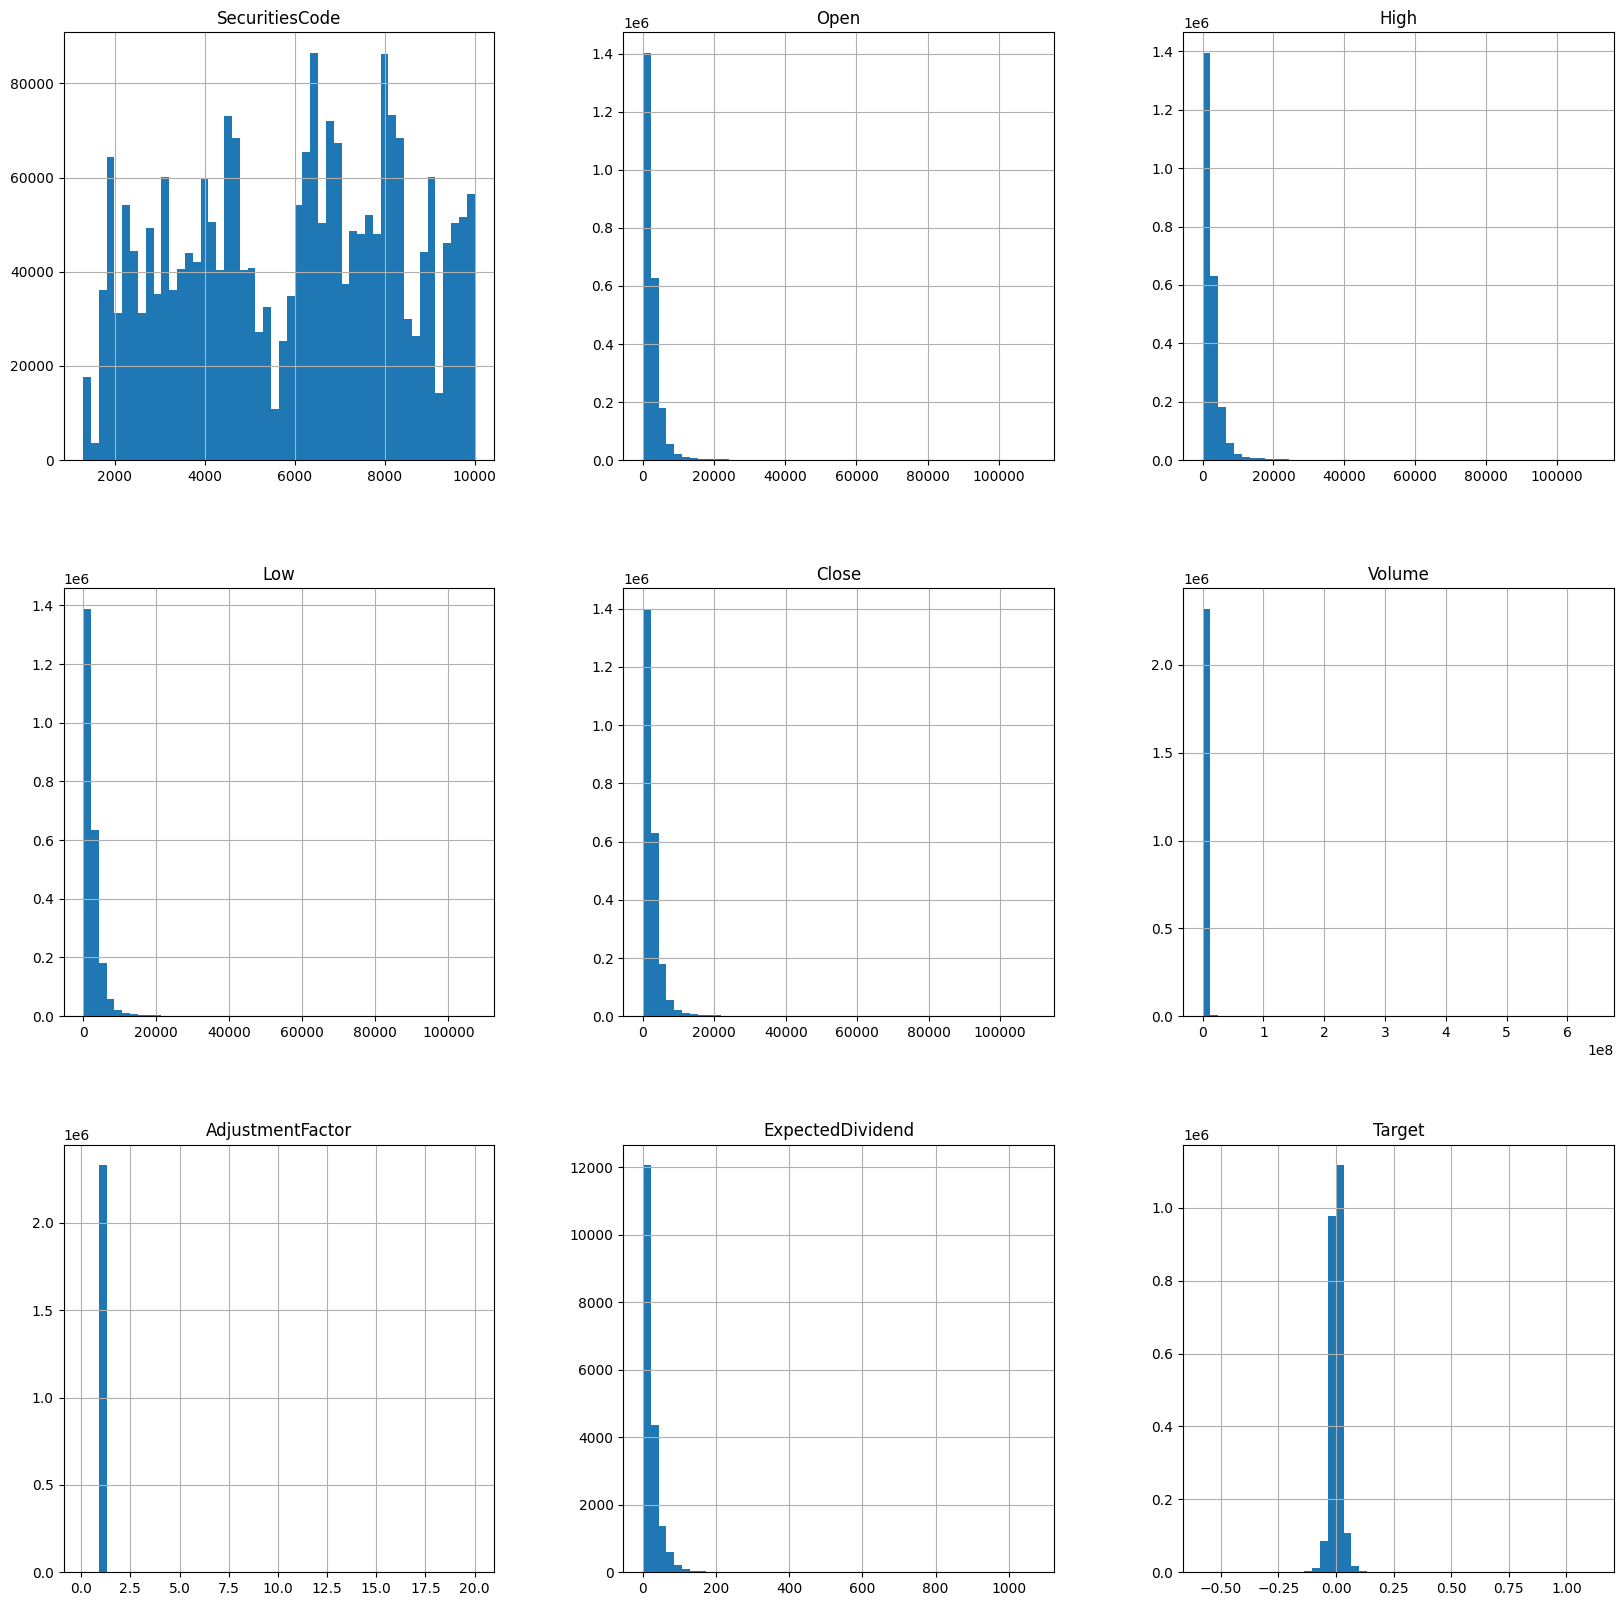

In [20]:
#plotting histogram for all the columns
data.hist(bins=50,figsize=(20,20))

In [24]:
#function to split the data into train, val and test without shuffling as this is time series data of stock prices
def split_data(data,train_size,val_size,test_size):
    train_end=int(train_size*len(data))
    val_end=int(val_size*len(data))
    train=data[:train_end]
    val=data[train_end:val_end]
    test=data[val_end:]
    return train,val,test

In [25]:
#splitting the data
train,val,test=split_data(data,train_size=0.8,val_size=0.1,test_size=0.1)
print("Train data shape",train.shape)
print("Val data shape",val.shape)
print("Test data shape",test.shape)


Train data shape (1866024, 12)
Val data shape (0, 12)
Test data shape (2099278, 12)


In [35]:
data["Volume_cat"]=pd.cut(data["Volume"],
                          bins=[0,25000,50000,75000,100000,125000,150000,175000,200000,np.inf],
                          labels=[1,2,3,4,5,6,7,8,9])

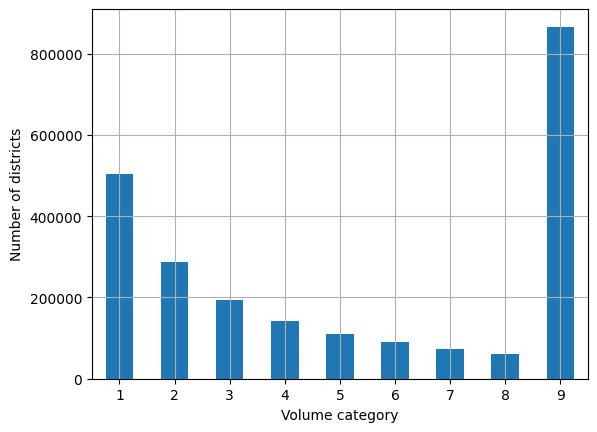

In [36]:
data["Volume_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Volume category")
plt.ylabel("Number of districts")
plt.show()

# Discover and Visualize the Data to Gain Insights

<Axes: xlabel='Target', ylabel='Volume'>

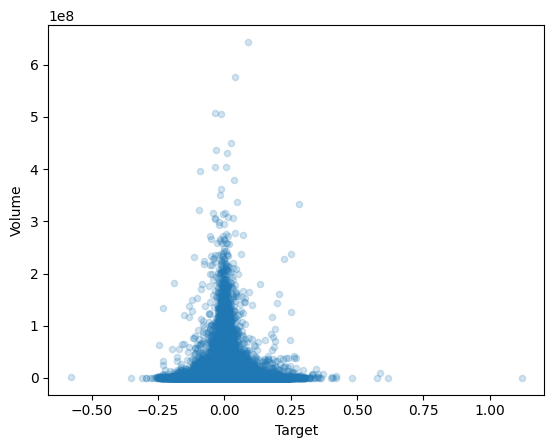

In [39]:
data.plot(kind="scatter",x="Target",y="Volume",alpha=0.2)